In [4]:
import pandas as pd
import numpy as np
import os
from scipy.stats import pearsonr,spearmanr
from itertools import combinations
import matplotlib.pyplot as plt

### Part1: Rice expression data
### Part2: Arabidopsis expression data

In [52]:
#metadata of the rice RNA-seq dataset
data=pd.read_csv('rice.csv',delimiter=',')
data

,Sample,Title,Project,Tissue,Organism,Cultivar,Genotype,Treatment,TotalReads,UniqelyMappedRate
0,DRX000523,Nipponbare shoot apices,PRJDA51203,shoot apices,Oryza sativa Japonica Group,Nipponbare,--,--,43917905,0.3413
1,DRX000459,Phosphate starvation_1day_Root,PRJDA60497,root,Oryza sativa Japonica Group,Nipponbare,--,P- 1day,18456442,0.2640
2,DRX000460,Phosphate starvation_5days_Root,PRJDA60497,root,Oryza sativa Japonica Group,Nipponbare,--,P- 5days,52848445,0.1799
3,DRX000461,Phosphate starvation_0day_Shoot,PRJDA60497,shoot,Oryza sativa Japonica Group,Nipponbare,--,P- 0day,18416024,0.1506
4,DRX000462,Phosphate starvation_1day_Shoot,PRJDA60497,shoot,Oryza sativa Japonica Group,Nipponbare,--,P- 1day,19123154,0.2659
...,...,...,...,...,...,...,...,...,...,...
11721,SRX9601822,GAPT (10) under deep-sowing conditions,PRJNA681386,mesocotyl,Oryza sativa Japonica Group,ZH10,--,GAPT (10) under deep-sowing conditions,30572537,0.8846
11722,SRX9601823,GAPT (10) under deep-sowing conditions,PRJNA681386,mesocotyl,Oryza sativa Japonica Group,ZH10,--,GAPT (10) under deep-sowing conditions,27350781,0.8614
11723,SRX9601824,GAPT (50) under deep-sowing conditions,PRJNA681386,mesocotyl,Oryza sativa Japonica Group,ZH10,--,GAPT (50) under deep-sowing conditions,26905734,0.8104
11724,SRX9601825,GAPT (50) under deep-sowing conditions,PRJNA681386,mesocotyl,Oryza sativa Japonica Group,ZH10,--,GAPT (50) under deep-sowing conditions,33133897,0.8390


In [53]:
#remove the experiments with low UniqelyMappedRate
data=data[data['UniqelyMappedRate'].astype(float)>=0.7]

# keep Japonica only
data=data[data['Organism']=='Oryza sativa Japonica Group']
data

,Sample,Title,Project,Tissue,Organism,Cultivar,Genotype,Treatment,TotalReads,UniqelyMappedRate
31,DRX021280,WT-Mock-1,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,wild type,mock,8563991,0.9085
32,DRX021281,WT-Mock-2,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,wild type,mock,13839281,0.9134
33,DRX021282,WT-Mock-3,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,wild type,mock,4192711,0.8360
34,DRX021283,WT-Myc-1,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,wild type,mycorrhizal fungi Myc-infected,7260040,0.8112
35,DRX021284,WT-Myc-2,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,wild type,mycorrhizal fungi Myc-infected,7859228,0.9084
...,...,...,...,...,...,...,...,...,...,...
11721,SRX9601822,GAPT (10) under deep-sowing conditions,PRJNA681386,mesocotyl,Oryza sativa Japonica Group,ZH10,--,GAPT (10) under deep-sowing conditions,30572537,0.8846
11722,SRX9601823,GAPT (10) under deep-sowing conditions,PRJNA681386,mesocotyl,Oryza sativa Japonica Group,ZH10,--,GAPT (10) under deep-sowing conditions,27350781,0.8614
11723,SRX9601824,GAPT (50) under deep-sowing conditions,PRJNA681386,mesocotyl,Oryza sativa Japonica Group,ZH10,--,GAPT (50) under deep-sowing conditions,26905734,0.8104
11724,SRX9601825,GAPT (50) under deep-sowing conditions,PRJNA681386,mesocotyl,Oryza sativa Japonica Group,ZH10,--,GAPT (50) under deep-sowing conditions,33133897,0.8390


In [54]:
#FPKM expression matrix of rice

# !wget https://plantrnadb.com//ricerna/download/rice.FPKM.csv.gz
# !gunzip rice.FPKM.csv.gz
expression_data=pd.read_csv('rice.FPKM.csv',delimiter='\t')
expression_data

,Sample,DRX000191,DRX000192,DRX000193,DRX000194,DRX000459,DRX000460,DRX000461,DRX000462,DRX000463,...,SRX995544,SRX995586,SRX996331,SRX997480,SRX997481,SRX997482,SRX997483,SRX997484,SRX997485,SRX999925
0,LOC_Os01g01010,15.268755,16.568817,19.024904,17.701206,16.977561,17.986280,11.269624,14.591229,17.524330,...,21.149156,23.180875,24.122983,24.438039,23.207914,16.977617,24.518545,24.859720,25.252166,17.116064
1,LOC_Os01g01019,2.504910,2.660919,3.043304,1.376035,0.767087,0.924965,0.000000,0.000000,0.000000,...,0.403395,1.533950,0.571020,0.000000,0.000000,0.000000,0.000000,0.233770,0.454545,0.000000
2,LOC_Os01g01030,11.447103,9.652100,8.583481,5.284901,6.093100,9.744825,8.253021,5.579443,4.793918,...,14.305287,19.410092,23.301051,2.829586,2.619839,1.502413,2.381293,2.135542,2.029598,4.103712
3,LOC_Os01g01040,34.293381,33.910740,27.656822,25.232180,26.808363,34.881031,22.332920,20.318493,23.307360,...,22.664380,25.000384,26.388866,30.967563,34.301285,27.039424,28.598560,33.797504,32.673144,45.393900
4,LOC_Os01g01050,28.606132,24.590117,24.032999,19.152186,14.520535,18.207930,13.118076,14.147202,15.181104,...,24.723315,17.425518,20.464533,15.905172,16.275866,15.113983,18.865055,17.887276,18.392338,25.502562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55796,LOC_Os12g44350,2.279168,1.770568,1.717613,2.090143,0.732267,1.012723,0.725096,0.707444,0.309821,...,2.962268,1.369891,1.096514,0.286912,0.578352,0.426060,0.516409,0.840120,0.755899,3.445364
55797,LOC_Os12g44360,59.566926,54.988474,41.747803,39.680938,71.154961,63.250050,30.285448,28.036575,31.480589,...,19.146715,19.314505,20.894522,80.461197,104.406798,50.610038,53.991331,83.980549,65.399936,32.147531
55798,LOC_Os12g44370,25.004959,16.815198,75.610438,76.637519,22.849792,34.985596,41.525494,44.426952,44.833065,...,12.296484,11.612606,11.569277,42.662981,43.432572,30.268586,40.641905,41.827810,40.596438,92.647747
55799,LOC_Os12g44380,49.477899,46.493671,50.044691,61.100333,58.159894,62.508018,56.948421,61.921551,58.224491,...,33.822852,27.608036,29.116231,89.424260,91.314127,69.061778,65.380267,82.622821,83.986344,62.735470


In [55]:
#Overlap the metadata with expression matrix
sample_cols = set(data['Sample'].astype(str))
filtered_expression_data = expression_data[[col for col in expression_data.columns if col in sample_cols]]
filtered_expression_data

,DRX002019,DRX002020,DRX002021,DRX002022,DRX002023,DRX002024,DRX002025,DRX002026,DRX002027,DRX002028,...,SRX978729,SRX978730,SRX978731,SRX978732,SRX997480,SRX997481,SRX997482,SRX997483,SRX997484,SRX997485
0,16.824098,16.627607,20.319211,19.144936,14.234455,17.065839,19.372313,15.390520,17.153356,13.870868,...,26.242015,36.329816,32.187027,33.365166,24.438039,23.207914,16.977617,24.518545,24.859720,25.252166
1,1.805149,1.473898,0.811533,1.538419,0.826333,1.994493,0.000000,0.562360,0.606385,0.729670,...,0.232034,0.934109,0.828543,0.818966,0.000000,0.000000,0.000000,0.000000,0.233770,0.454545
2,7.910674,10.146274,6.178662,7.987102,6.285635,6.304536,6.768869,6.981328,6.360870,3.959825,...,2.929483,4.038496,2.225805,4.227445,2.829586,2.619839,1.502413,2.381293,2.135542,2.029598
3,29.488632,34.874516,31.549663,31.867572,33.129708,28.822140,30.560784,31.748997,24.513303,26.261350,...,28.000560,32.242140,27.241267,29.694377,30.967563,34.301285,27.039424,28.598560,33.797504,32.673144
4,18.861602,21.590880,16.908844,22.240823,16.745333,17.694013,16.029638,15.417537,12.582591,14.384530,...,20.471793,25.690451,22.436782,28.737599,15.905172,16.275866,15.113983,18.865055,17.887276,18.392338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55796,0.975032,0.000000,0.894386,0.000000,0.448963,0.991703,0.625805,0.923572,0.491300,0.197062,...,0.760485,1.069718,0.708746,1.679949,0.286912,0.578352,0.426060,0.516409,0.840120,0.755899
55797,111.732845,118.578063,94.573178,118.848767,78.734706,77.796764,90.704254,71.742168,29.328588,33.281492,...,48.976490,48.286848,41.919571,44.038142,80.461197,104.406798,50.610038,53.991331,83.980549,65.399936
55798,18.007179,19.103198,21.709671,17.593941,13.770154,12.184355,10.155636,12.655193,15.927035,15.495472,...,44.035984,35.974829,42.218200,37.423190,42.662981,43.432572,30.268586,40.641905,41.827810,40.596438
55799,35.477147,35.196199,37.735940,43.269552,46.293989,43.348494,38.331618,50.832378,54.516409,66.738073,...,68.522971,67.713693,75.147708,63.128319,89.424260,91.314127,69.061778,65.380267,82.622821,83.986344


In [56]:
# overlap expression matrix with metadata
col_names = filtered_expression_data.columns.tolist()
data = data[data['Sample'].isin(col_names)]
data

,Sample,Title,Project,Tissue,Organism,Cultivar,Genotype,Treatment,TotalReads,UniqelyMappedRate
31,DRX021280,WT-Mock-1,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,wild type,mock,8563991,0.9085
32,DRX021281,WT-Mock-2,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,wild type,mock,13839281,0.9134
33,DRX021282,WT-Mock-3,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,wild type,mock,4192711,0.8360
34,DRX021283,WT-Myc-1,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,wild type,mycorrhizal fungi Myc-infected,7260040,0.8112
35,DRX021284,WT-Myc-2,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,wild type,mycorrhizal fungi Myc-infected,7859228,0.9084
...,...,...,...,...,...,...,...,...,...,...
8442,DRX162781,s2_flooded,PRJDB8093,seedling,Oryza sativa Japonica Group,Nipponbare,--,flooded,13060953,0.9548
8443,DRX162782,s3_flooded,PRJDB8093,seedling,Oryza sativa Japonica Group,Nipponbare,--,flooded,12782639,0.9459
8444,DRX162783,s4_upland,PRJDB8093,seedling,Oryza sativa Japonica Group,Nipponbare,--,unpland,15819687,0.9581
8445,DRX162784,s5_upland,PRJDB8093,seedling,Oryza sativa Japonica Group,Nipponbare,--,unpland,14989752,0.9525


In [59]:
new_columns = []
def cal_pr(arrays):
    arrays=arrays.T
    pr_scores=[]
    for i in range(arrays.shape[0]-1):
        for j in range(i + 1, arrays.shape[0]):
            corr= pearsonr(arrays[i], arrays[j])[0]
            pr_scores.append(corr)
    return pr_scores

# 1. find replicates with same title
grouped = data.groupby(['Project','Title','Tissue','Organism','Cultivar','Genotype','Treatment'])
for k, v in grouped:
    if v.shape[0]>1:
        exp_mat=filtered_expression_data[v['Sample']].astype(float).to_numpy()
        pr_scores=cal_pr(exp_mat)
        mean_pr,min_pr=np.mean(pr_scores),np.min(pr_scores)
        if min_pr>0.95:
            rid=v['Sample'].iloc[0]
            new_columns.append((rid, exp_mat.mean(1)))
groups_with_duplicates = grouped.filter(lambda x: len(x) > 1)
indices_to_remove = groups_with_duplicates.index
data1 = data.drop(indices_to_remove)


# 2. find replicates indicated by different numbers in the title
grouped_data=data1.groupby('Project')
for i, (groupid,g_data) in enumerate(grouped_data):
    rep_data=g_data.groupby(['Tissue','Organism','Cultivar','Genotype','Treatment'])
    for keys, r_data in rep_data:
        if r_data.shape[0]>1:
            r_data['Title_1'] = r_data['Title'].str.replace(r'\d+$', '', regex=True).str.strip()
            r_r_data=r_data.groupby('Title_1')
            for k_r,kr_r_data in r_r_data:
                if kr_r_data.shape[0]>1:
                    exp_mat=filtered_expression_data[kr_r_data['Sample']].astype(float).to_numpy()
                    pr_scores=cal_pr(exp_mat)
                    mean_pr,min_pr=np.mean(pr_scores),np.min(pr_scores)
                    if min_pr>0.95:
                        rid=kr_r_data['Sample'].iloc[0]
                        new_columns.append((rid, exp_mat.mean(1)))
                    
filtered_expression_matrix=pd.DataFrame(dict(new_columns))
filtered_expression_matrix

,DRX012209,DRX012214,DRX012216,DRX012218,DRX005894,DRX005928,DRX005904,DRX005789,DRX005753,DRX005804,...,SRX6423933,SRX6423921,SRX6423940,SRX6423930,SRX6423925,SRX6423929,SRX6423939,SRX6423926,SRX6423935,SRX6423919
0,13.938471,17.997272,18.858011,11.394172,19.534001,21.637889,11.103824,8.061179,16.984160,15.656962,...,19.451015,20.374660,19.072257,20.685840,19.539954,20.224418,19.000732,19.757609,21.140604,18.041918
1,0.585383,0.000000,0.232950,0.000000,0.744076,2.459398,0.000000,3.438560,0.000000,1.243146,...,4.371069,3.157898,2.652853,7.178580,6.063981,3.239810,2.480120,2.386910,5.334203,4.689739
2,8.786055,4.302561,2.504983,1.449140,12.431981,9.610867,1.079296,7.471909,10.759197,6.907622,...,16.274782,17.007995,17.071750,18.897389,18.252357,16.741287,18.592128,16.955833,20.532976,16.803608
3,28.348838,31.095528,31.280689,22.709574,36.413533,31.303840,32.941443,25.062176,40.143527,28.446723,...,29.820118,30.015481,29.714135,32.064917,31.255226,31.940565,29.829153,29.603807,30.835725,28.855920
4,18.003177,22.804090,23.858991,11.066576,17.927603,22.265485,12.649489,12.169825,12.394569,19.566891,...,14.450050,12.897057,14.502387,18.270850,16.345838,14.259120,13.371117,13.981194,16.551676,15.127628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55796,0.474284,1.969369,1.344249,0.260229,0.143374,2.121671,1.187382,2.012811,0.776582,0.360469,...,2.511509,4.592353,4.261571,0.679428,0.645862,3.397938,1.669513,4.960567,0.288318,1.483856
55797,110.416063,61.194098,53.067288,33.690780,105.036934,88.761376,62.753487,89.387787,76.318828,121.943576,...,38.071310,39.993093,42.603716,37.942185,41.405395,38.210052,40.443121,41.711527,41.013542,34.573157
55798,16.879303,30.422131,21.527803,20.548033,11.325294,13.231466,27.752239,5.515437,9.053553,14.054756,...,3.502271,2.904778,2.920849,10.312029,9.050636,2.811083,2.202955,2.982489,10.165286,6.519240
55799,40.855267,57.386861,54.467867,67.955447,36.043080,40.187905,97.065409,27.381777,40.077446,39.437577,...,40.128068,40.669081,38.322324,43.684950,42.015657,42.654709,40.180560,41.023057,41.531534,42.261626


In [60]:
col_names = filtered_expression_matrix.columns.tolist()
filtered_replicated_metadata = data[data['Sample'].isin(col_names)]
filtered_replicated_metadata

,Sample,Title,Project,Tissue,Organism,Cultivar,Genotype,Treatment,TotalReads,UniqelyMappedRate
31,DRX021280,WT-Mock-1,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,wild type,mock,8563991,0.9085
34,DRX021283,WT-Myc-1,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,wild type,mycorrhizal fungi Myc-infected,7260040,0.8112
37,DRX021286,WT-GN7-1,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,wild type,chitin oligosaccharides (N-acetylchitoheptaose...,6612859,0.9188
40,DRX021289,cerk1-Mock-1,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,cerk1 mutant,chitin receptor gene transcected,13484127,0.8002
43,DRX021292,cerk1-Myc-1,PRJDB1490,leaf,Oryza sativa Japonica Group,Nipponbare BL no. 2,cerk1 mutant,"chitin receptor gene transcected, Myc-LCO (arb...",11232194,0.9042
...,...,...,...,...,...,...,...,...,...,...
8084,SRX4881243,Flower_1,PRJNA482217,flower,Oryza sativa Japonica Group,Nipponbare,--,--,135776272,0.8986
8085,SRX4881242,Seedling_3,PRJNA482217,seedling,Oryza sativa Japonica Group,Nipponbare,--,--,93823846,0.8427
8086,SRX4881240,Stem_2,PRJNA482217,stem,Oryza sativa Japonica Group,Nipponbare,--,--,100751979,0.8925
8088,SRX4881233,Root_1,PRJNA482217,root,Oryza sativa Japonica Group,Nipponbare,--,--,123792466,0.9030


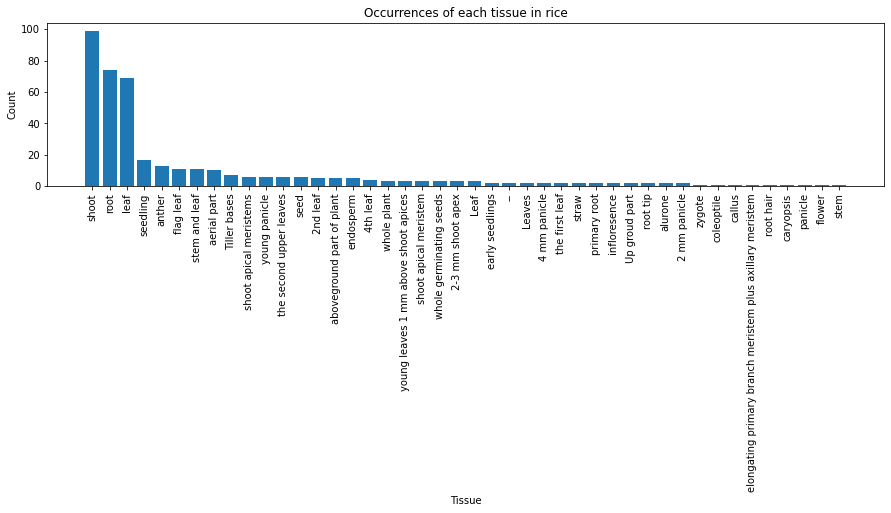

In [61]:
value_counts = filtered_replicated_metadata['Tissue'].value_counts()
fig,ax=plt.subplots(figsize=(15,3))
plt.bar(value_counts.index, value_counts.values)
plt.xticks(rotation=90) 
plt.xlabel('Tissue')
plt.ylabel('Count')
plt.title('Occurrences of each tissue in rice')
plt.show()

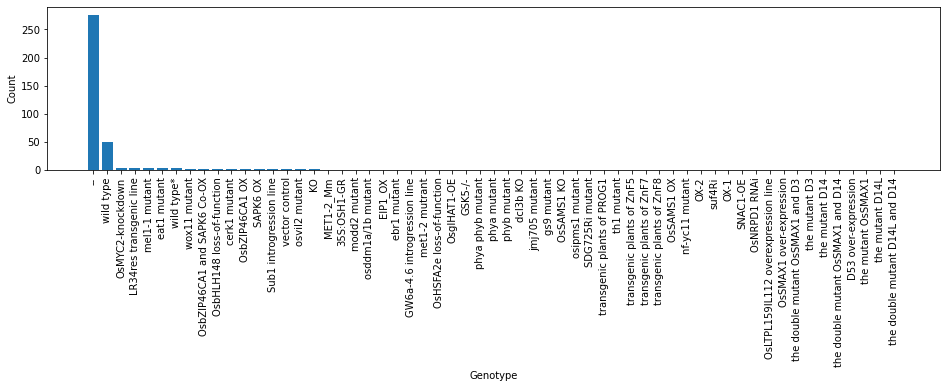

In [62]:
value_counts = filtered_replicated_metadata['Genotype'].value_counts()
fig,ax=plt.subplots(figsize=(16,3))
plt.bar(value_counts.index, value_counts.values)
plt.xticks(rotation=90) 
plt.xlabel('Genotype')
plt.ylabel('Count')
plt.show()

## Part2: the following code is for arabidopsis expression data

In [2]:
## load the metadata
ara_data=pd.read_csv('arabidopsis.csv',delimiter=',', encoding='latin1')
ara_data=ara_data[ara_data['UniqelyMappedRate'].astype(float)>=0.7]
ara_data=ara_data[ara_data['Ecotype']=='Col-0']
ara_data

,Sample,Title,Tissue,Ecotype,Genotype,Treatment,Project,TotalReads,UniqelyMappedRate,Unnamed: 9
0,DRX007662,Arabidopsis WT-Col mRNA_seq,--,Col-0,wild type,--,PRJDB2180,30664389,0.8615,NaN
1,DRX007663,Arabidopsis ibm1-4 mRNA_seq,--,Col-0,ibm1-4,--,PRJDB2180,38551905,0.9114,NaN
2,DRX007664,Arabidopsis ibm2-2 mRNA_seq,--,Col-0,ibm2-2,--,PRJDB2180,37223057,0.8343,NaN
24,DRX014760,Col-0 rep1,seedlings,Col-0,wild type,--,PRJDB2380,11879962,0.7388,NaN
25,DRX014761,Col-0 rep2,seedlings,Col-0,wild type,--,PRJDB2380,14640751,0.7499,NaN
...,...,...,...,...,...,...,...,...,...,...
28153,SRX8094380,at_inflorescence_RNA_rep2_4x Col,inflorescence,Col-0,--,--,PRJNA624290,26026939,0.9023,NaN
28154,SRX8094381,at_inflorescence_RNA_rep2_4x Col,inflorescence,Col-0,--,--,PRJNA624290,26212888,0.8925,NaN
28155,SRX8094382,at_inflorescence_RNA_rep3_4x Col,inflorescence,Col-0,--,--,PRJNA624290,26102472,0.9034,NaN
28162,SRX8094395,at_inflorescence_RNA_rep1_2x Col,inflorescence,Col-0,--,--,PRJNA624290,27396800,0.9127,NaN


#### Download the expression matrix

In [5]:
file_lst=os.listdir('.') 
if not 'gene_FPKM_200501.csv' in file_lst:
    !wget https://plantrnadb.com//athrdb/download/gene_FPKM_200501.csv.gz
    !gunzip gene_FPKM_200501.csv.gz

In [6]:
ara_expression_data=pd.read_csv('gene_FPKM_200501.csv',delimiter=',')
ara_expression_data

,Sample,DRX007662,DRX007663,DRX007664,DRX014481,DRX014482,DRX014483,DRX014484,DRX014485,DRX014494,...,SRX8094381,SRX8094382,SRX8094383,SRX8094384,SRX8094385,SRX8094386,SRX8094387,SRX8094388,SRX8094395,SRX8094396
0,AT1G01010,12.141565,16.281420,14.482322,35.198841,34.900879,32.782047,33.612774,33.505569,8.470595,...,10.168415,12.729012,9.323133,10.052909,9.293207,9.864200,9.960164,10.848275,13.417080,11.806663
1,AT1G01020,12.166693,18.054251,12.075236,37.149830,32.118715,29.543544,30.855234,27.775802,19.441669,...,17.208616,18.254053,18.378674,19.131368,10.509772,16.705934,18.782826,16.801317,17.736352,17.179124
2,AT1G01030,9.396695,9.704697,8.211935,4.360510,6.576411,9.263298,6.818343,9.044685,4.510589,...,8.914254,10.175007,13.079280,12.099891,14.293529,12.292765,11.533351,11.145923,6.936923,7.441224
3,AT1G01040,25.278412,24.429031,22.484845,17.515532,21.109454,26.359860,27.248196,30.507202,11.409953,...,27.912726,29.768667,30.593351,29.777542,25.795004,28.197031,28.734323,28.175734,27.058051,22.739962
4,AT1G01050,64.082870,66.022141,62.268711,58.068538,48.401411,44.786707,49.986196,43.482371,97.359375,...,56.983173,58.731609,63.564445,63.861366,61.211609,66.385856,60.672027,61.339108,60.429501,60.650498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37331,ATMG09730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37332,ATMG09740,0.000000,0.000000,0.775861,1.073860,0.699342,0.510574,1.262659,0.269661,0.000000,...,0.510521,0.000000,0.000000,1.172484,0.000000,0.000000,0.000000,0.000000,1.378927,1.081175
37333,ATMG09950,1.445471,1.690331,2.028465,3.671937,3.809728,2.389488,3.645275,2.453842,0.241510,...,1.412261,0.287516,1.125739,0.982515,1.765830,1.040028,0.149478,0.227323,0.771704,0.643133
37334,ATMG09960,0.000000,0.000000,0.000000,4.392009,3.146867,3.338589,5.209689,2.499084,2.006699,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.736716,0.475261,0.000000,0.619293


In [12]:
ara_expression_data['GSM4231572']

0         0.683719
1        12.214132
2         1.502694
3         8.621234
4        99.480018
           ...    
37331     0.000000
37332     0.000000
37333     0.000000
37334     0.000000
37335    13.149615
Name: GSM4231572, Length: 37336, dtype: float64

In [15]:
print(pearsonr(np.array(ara_expression_data['GSM4231572']),np.array(ara_expression_data['GSM4231573']))[0])
ara_expression_data['GSM4231573']

0.9732844912266747


0          1.415671
1          0.000000
2          1.884701
3          9.269034
4        109.675331
            ...    
37331      0.000000
37332      0.000000
37333      8.004724
37334      0.000000
37335     42.950626
Name: GSM4231573, Length: 37336, dtype: float64

In [7]:
sample_cols = set(ara_data['Sample'].astype(str))
ara_filtered_expression_data = ara_expression_data[[col for col in ara_expression_data.columns if col in sample_cols]]
col_names = ara_filtered_expression_data.columns.tolist()
ara_data = ara_data[ara_data['Sample'].isin(col_names)]
ara_data

,Sample,Title,Tissue,Ecotype,Genotype,Treatment,Project,TotalReads,UniqelyMappedRate,Unnamed: 9
0,DRX007662,Arabidopsis WT-Col mRNA_seq,--,Col-0,wild type,--,PRJDB2180,30664389,0.8615,NaN
1,DRX007663,Arabidopsis ibm1-4 mRNA_seq,--,Col-0,ibm1-4,--,PRJDB2180,38551905,0.9114,NaN
2,DRX007664,Arabidopsis ibm2-2 mRNA_seq,--,Col-0,ibm2-2,--,PRJDB2180,37223057,0.8343,NaN
24,DRX014760,Col-0 rep1,seedlings,Col-0,wild type,--,PRJDB2380,11879962,0.7388,NaN
25,DRX014761,Col-0 rep2,seedlings,Col-0,wild type,--,PRJDB2380,14640751,0.7499,NaN
...,...,...,...,...,...,...,...,...,...,...
28153,SRX8094380,at_inflorescence_RNA_rep2_4x Col,inflorescence,Col-0,--,--,PRJNA624290,26026939,0.9023,NaN
28154,SRX8094381,at_inflorescence_RNA_rep2_4x Col,inflorescence,Col-0,--,--,PRJNA624290,26212888,0.8925,NaN
28155,SRX8094382,at_inflorescence_RNA_rep3_4x Col,inflorescence,Col-0,--,--,PRJNA624290,26102472,0.9034,NaN
28162,SRX8094395,at_inflorescence_RNA_rep1_2x Col,inflorescence,Col-0,--,--,PRJNA624290,27396800,0.9127,NaN


In [8]:
new_columns = []
new_columns.append(('Sample',ara_expression_data['Sample']))
def cal_pr(arrays):
    arrays=arrays.T
    pr_scores=[]
    for i in range(arrays.shape[0]-1):
        for j in range(i + 1, arrays.shape[0]):
            corr= pearsonr(arrays[i], arrays[j])[0]
            pr_scores.append(corr)
    return pr_scores

# step 1
grouped = ara_data.groupby(['Project','Title','Tissue','Ecotype','Genotype','Treatment'])
for k, v in grouped:
    if v.shape[0]>1:
        exp_mat=ara_filtered_expression_data[v['Sample']].astype(float).to_numpy()
        pr_scores=cal_pr(exp_mat)
        mean_pr,min_pr=np.mean(pr_scores),np.min(pr_scores)
        if min_pr>0.95:
            rid=v['Sample'].iloc[0]
            new_columns.append((rid, exp_mat.mean(1)))      
groups_with_duplicates = grouped.filter(lambda x: len(x) > 1)
indices_to_remove = groups_with_duplicates.index
ara_data1 = ara_data.drop(indices_to_remove)

# step 2
grouped_data=ara_data1.groupby('Project')
for i, (groupid,g_data) in enumerate(grouped_data):
    rep_data=g_data.groupby(['Tissue','Ecotype','Genotype','Treatment'])
    for keys, r_data in rep_data:
        if r_data.shape[0]>1:
            r_data['Title_1'] = r_data['Title'].str.replace(r'\d+$', '', regex=True).str.strip()
            r_r_data=r_data.groupby('Title_1')
            for k_r,kr_r_data in r_r_data:
                if kr_r_data.shape[0]>1:
                    exp_mat=ara_filtered_expression_data[kr_r_data['Sample']].astype(float).to_numpy()
                    pr_scores=cal_pr(exp_mat)
                    mean_pr,min_pr=np.mean(pr_scores),np.min(pr_scores)
                    if min_pr>0.95:
                        rid=kr_r_data['Sample'].iloc[0]
                        new_columns.append((rid, exp_mat.mean(1)))
ara_filtered_expression_matrix=pd.DataFrame(dict(new_columns))


ara_filtered_expression_matrix.to_csv('arabidopsis_expression_matrix.txt', sep='\t', index=False)
ara_filtered_expression_matrix

,Sample,ERX1946687,ERX1946688,ERX1946689,ERX1946691,ERX1946693,ERX1946694,ERX1946679,ERX1946697,ERX1946698,...,SRX7913302,SRX7913308,SRX7913305,SRX7949143,SRX7949151,SRX7949154,GSM4422802,SRX145599,SRX145601,SRX145572
0,AT1G01010,9.549938,9.290362,9.718265,9.320113,7.727772,8.890327,9.202206,7.516327,7.106299,...,10.046072,8.153307,9.191076,1.348066,7.961390,7.379849,8.368486,23.087263,25.072099,25.620284
1,AT1G01020,17.366722,16.424985,14.706285,13.632893,17.120003,16.216256,21.308792,16.277702,17.832624,...,8.658232,13.048400,8.251458,19.198215,17.618640,18.382744,21.664295,18.614628,18.288629,18.300576
2,AT1G01030,2.370682,3.456960,3.466671,4.023898,2.987786,2.447023,3.336052,2.156807,2.377292,...,1.748905,2.095745,1.106731,14.369617,19.183660,8.563981,3.349984,4.683484,4.407466,3.920962
3,AT1G01040,28.222950,31.680245,30.870991,25.515105,23.358496,23.505800,26.544297,23.940144,23.049474,...,12.883631,14.345799,9.572236,8.205194,8.752240,11.793794,16.420449,23.384185,20.335179,23.180630
4,AT1G01050,69.038528,70.013577,74.540153,85.164081,76.150845,78.994937,68.504111,79.356451,82.143959,...,73.980990,72.022104,86.217547,69.526206,53.303801,57.050528,75.563856,71.424183,72.085186,68.909228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37331,ATMG09730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37332,ATMG09740,0.093549,0.108543,0.230965,0.291324,0.099224,0.294433,0.043048,0.054354,0.112172,...,0.000000,0.389842,0.035197,35.595999,33.370597,46.303811,0.000000,0.000000,0.796520,0.063929
37333,ATMG09950,0.000000,0.321113,0.146969,0.000000,0.338006,0.260572,0.390184,0.000000,0.000000,...,0.599381,1.426437,0.336607,45.386140,41.798265,53.913076,0.000000,1.952781,1.064701,1.322610
37334,ATMG09960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.202387,18.383343,14.205293,0.000000,0.579943,0.000000,0.519587


In [9]:
col_names = ara_filtered_expression_matrix.columns.tolist()
ara_replicated_metadata = ara_data[ara_data['Sample'].isin(col_names)]

ara_replicated_metadata.to_csv('arabidopsis_expression_metadata.txt', sep='\t', index=False)
ara_replicated_metadata

,Sample,Title,Tissue,Ecotype,Genotype,Treatment,Project,TotalReads,UniqelyMappedRate,Unnamed: 9
24,DRX014760,Col-0 rep1,seedlings,Col-0,wild type,--,PRJDB2380,11879962,0.7388,NaN
26,DRX014762,RNA Seq of rfl2_5,seedlings,Col-0,rfl2,--,PRJDB2380,14744964,0.7357,NaN
39,DRX029882,WT_1,whole plant,Col-0,--,--,PRJDB3468,3927300,0.8899,NaN
53,DRX064451,Ctrl_1,root,Col-0,--,Mock,PRJDB5141,20137756,0.9228,NaN
54,DRX064452,N_1,root,Col-0,--,#NAME?,PRJDB5141,19725062,0.9308,NaN
...,...,...,...,...,...,...,...,...,...,...
28079,SRX7913308,At_HW_1,leaf,Col-0,--,pretreated with H2O2 and water treated 12h,PRJNA612654,10522419,0.9288,NaN
28083,SRX7949143,Col-0_RNA-seq_rp1,leaf,Col-0,--,--,PRJNA613247,24207112,0.7575,NaN
28086,SRX7949151,amiR-PAG1_RNA-seq_rp1,leaf,Col-0,--,--,PRJNA613247,25032646,0.7693,NaN
28089,SRX7949154,se-2_RNA-seq_rp1,leaf,Col-0,--,--,PRJNA613247,23645521,0.7857,NaN


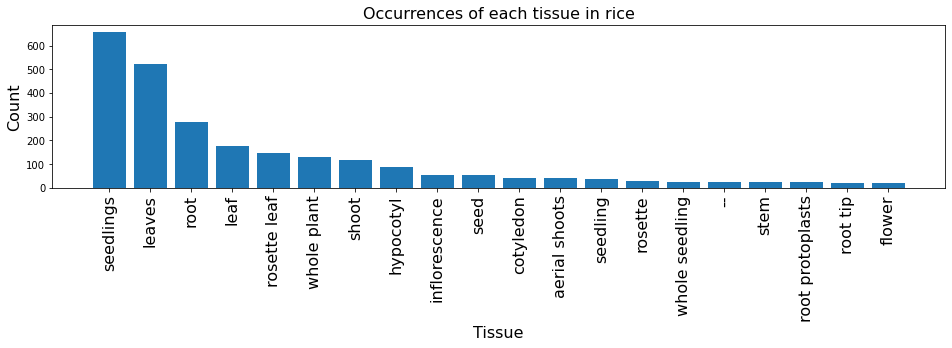

In [10]:
value_counts = ara_replicated_metadata['Tissue'].value_counts()
fig,ax=plt.subplots(figsize=(16,3))
plt.bar(value_counts.index[:20], value_counts.values[:20])
plt.xticks(rotation=90,fontsize=16) 
plt.xlabel('Tissue',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Occurrences of each tissue in rice',fontsize=16)
plt.show()

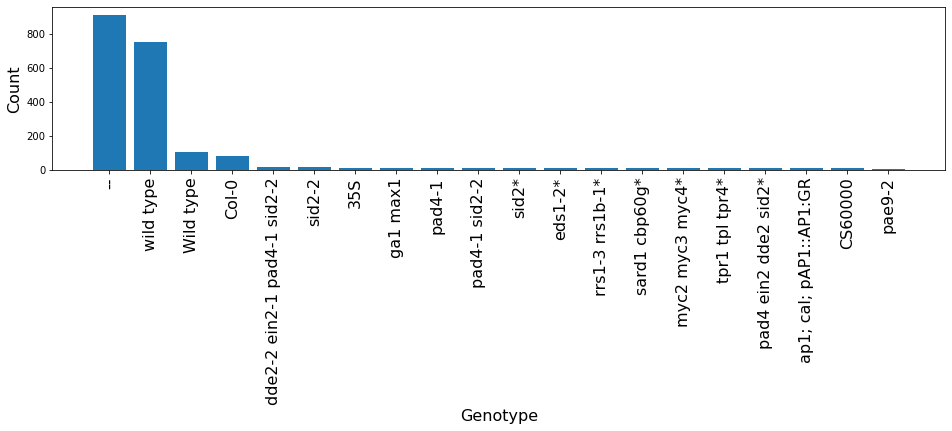

In [11]:
value_counts = ara_replicated_metadata['Genotype'].value_counts()
fig,ax=plt.subplots(figsize=(16,3))
plt.bar(value_counts.index[:20], value_counts.values[:20])
plt.xticks(rotation=90,fontsize=16) 
plt.xlabel('Genotype',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()